<a href="https://colab.research.google.com/github/runeking2006/vac_1/blob/main/used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BASICS

In [ ]:
import pandas as pd
import numpy as np

data={
    'Age':[25,30,np.nan,35,40],
    'Salary':[50000,60000,np.nan,75000,80000],
    'Gender':['Male','Female','Male','Female',np.nan]
}

In [ ]:
df = pd.DataFrame(data)
print("Original DataFrame with missing values:")
print(df)

Original DataFrame with missing values:
    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2   NaN      NaN    Male
3  35.0  75000.0  Female
4  40.0  80000.0     NaN


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age       1
Salary    1
Gender    1
dtype: int64


In [ ]:
numerical_cols = ['Age', 'Salary']
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

print("DataFrame after imputing missing numerical values with column means:")
print(df)

DataFrame after imputing missing numerical values with column means:
    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2  32.5  66250.0    Male
3  35.0  75000.0  Female
4  40.0  80000.0     NaN


/tmp/ipython-input-4256637113.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [ ]:
categorical_cols = ['Gender']
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Get the first mode if there are multiple
    df[col] = df[col].fillna(mode_value)

print("DataFrame after imputing missing categorical values with column modes:")
print(df)

DataFrame after imputing missing categorical values with column modes:
    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2  32.5  66250.0    Male
3  35.0  75000.0  Female
4  40.0  80000.0  Female


In [ ]:
print("Final DataFrame:")
print(df)

Final DataFrame:
    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2  32.5  66250.0    Male
3  35.0  75000.0  Female
4  40.0  80000.0  Female


ANALYSIS-1

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/used_cars_data.csv")

In [ ]:
data=data.drop(['S.No.'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


In [ ]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,11
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,15
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,14
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,13


In [ ]:
data['Brand']=data.Name.str.split().str.get(0)
data['Model']=data.Name.str.split().str.get(1)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta
2,Honda Jazz V,Honda,Jazz
3,Maruti Ertiga VDI,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Nissan,Micra
7251,Volkswagen Polo GT TSI,Volkswagen,Polo


#task

1.take the brand seperately
2.group by brands and sum of the price
3.plot a pie chart
4.use explode and highlight the price of the brand 'MARUTHI'
5.consider the top 5 brands alone and implement a bar plot

In [ ]:
data['Brand']=data.Name.str.split().str.get(0)
data['Brand']

,Brand
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi
...,...
7248,Volkswagen
7249,Volkswagen
7250,Nissan
7251,Volkswagen


In [ ]:
print(data.groupby(data['Brand'])['Price'].sum())

Brand
Ambassador          1.35
Audi             6026.90
BMW              6739.92
Bentley            59.00
Chevrolet         368.38
Datsun             39.64
Fiat               91.54
Force              28.00
Ford             2066.82
Hindustan           0.00
Honda            3290.34
Hyundai          5915.18
ISUZU              24.09
Isuzu              20.00
Jaguar           1505.29
Jeep              280.78
Lamborghini       120.00
Land             2355.57
Mahindra         2188.49
Maruti           5470.41
Mercedes-Benz    8525.54
Mini              699.32
Mitsubishi        298.59
Nissan            431.19
OpelCorsa           0.00
Porsche           870.27
Renault           840.86
Skoda            1307.72
Smart               3.00
Tata              662.69
Toyota           4759.39
Volkswagen       1671.79
Volvo             394.86
Name: Price, dtype: float64


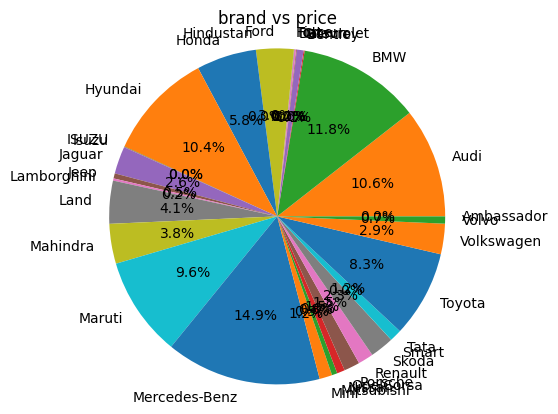

In [ ]:
import matplotlib.pyplot as plt

pie_value = data.groupby(data['Brand'])['Price'].sum()
plt.pie(pie_value, labels=pie_value.index, autopct='%1.1f%%')
plt.title('brand vs price')
plt.axis('equal')
plt.show()

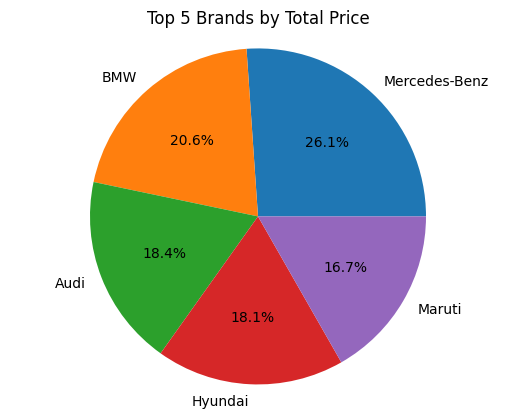

In [ ]:
import matplotlib.pyplot as plt

# 1. Sum price per brand
brand_price = data.groupby('Brand')['Price'].sum()

# 2. Take top 5 brands
top5 = brand_price.sort_values(ascending=False).head(5)

# 3. Plot pie chart
plt.pie(
    top5,
    labels=top5.index,
    autopct='%1.1f%%')

plt.title('Top 5 Brands by Total Price')
plt.axis('equal')
plt.show()


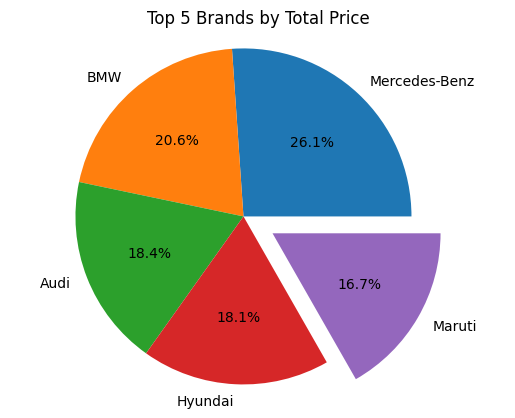

In [ ]:
import matplotlib.pyplot as plt

brand_price = data.groupby('Brand')['Price'].sum()

top5 = brand_price.sort_values(ascending=False).head(5)

explode=[0. if brand == 'Maruti' else 0 for brand in
           top5.index]

plt.pie(
    top5,
    labels=top5.index,
    autopct='%1.1f%%',explode=explode)

plt.title('Top 5 Brands by Total Price')
plt.axis('equal')
plt.show()